## Import some 'braries

In [189]:
import pandas as pd
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from vaderSentiment import vaderSentiment as vader 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
pd.options.display.max_columns = 999
from imblearn.over_sampling import SMOTE
import numpy as np
import sklearn
 
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LogisticRegression

## Data Importation and Cleaning

In [104]:
df = pd.read_excel('Restaurant_1.xlsx')

In [105]:
rv = pd.read_excel('yelp_reviews.xlsx')

In [106]:
df.drop(columns='Unnamed: 0', inplace=True)
rv.drop(columns='Unnamed: 0', inplace=True)
rv.rename(columns={'Restaurant_Id':'restaurant_id'}, inplace=True)

In [107]:
rva = ['review_'+ str(x+1) for x in range(20)]

In [108]:
newlist = df.merge(rv, how='left', on="restaurant_id")
newlist.drop(columns='review_count', inplace=True)

In [109]:
newlist.dropna(axis=0, how='any',inplace=True)

### Dividing Target from Features

In [110]:
labels = newlist.rating

In [111]:
newlist.drop(columns=['restaurant_id', 'restaurant_name', 'price', 'rating'], inplace=True)

In [112]:
analyzer = SentimentIntensityAnalyzer()

## Vaderizin'

In [113]:
#prepping list for Vader loops
vad = ['review_vader_'+ str(x+1) for x in range(20)]
lis = ['features'+str(x+1) for x in range(20)]
nums = [x for x in range(1,21)]

In [114]:
#Vaderizn'
for j in tqdm(nums):
    lis[j-1] = newlist[rva[j-1]].apply(lambda x: analyzer.polarity_scores(x)).apply(pd.Series)
    newlist = pd.concat([newlist,lis[j-1].apply(pd.Series)],1)
    newlist.rename(columns={'neg': 'neg'+str(j), 'neu': 'neu'+str(j), 'pos': 'pos'+str(j), 'compound': 'compound'+str(j)}, inplace=True)
        
        











  0%|          | 0/20 [00:00<?, ?it/s]









  5%|▌         | 1/20 [00:03<00:59,  3.15s/it]









 10%|█         | 2/20 [00:06<01:00,  3.34s/it]









 15%|█▌        | 3/20 [00:10<00:57,  3.36s/it]









 20%|██        | 4/20 [00:13<00:53,  3.32s/it]









 25%|██▌       | 5/20 [00:17<00:51,  3.46s/it]









 30%|███       | 6/20 [00:20<00:47,  3.41s/it]









 35%|███▌      | 7/20 [00:24<00:44,  3.44s/it]









 40%|████      | 8/20 [00:27<00:40,  3.36s/it]









 45%|████▌     | 9/20 [00:30<00:37,  3.41s/it]









 50%|█████     | 10/20 [00:34<00:34,  3.44s/it]









 55%|█████▌    | 11/20 [00:37<00:31,  3.47s/it]









 60%|██████    | 12/20 [00:41<00:28,  3.55s/it]









 65%|██████▌   | 13/20 [00:45<00:24,  3.51s/it]









 70%|███████   | 14/20 [00:48<00:21,  3.55s/it]









 75%|███████▌  | 15/20 [00:52<00:18,  3.62s/it]









 80%|████████  | 16/20 [00:56<00:14,  3.62s/it]









 85%|████████▌ | 17/20 [01:00<00:11,  3

In [115]:
#save to csv to avoid doing more work
newlist.to_csv('first1000.csv')

In [116]:
nl = pd.read_csv('first1000.csv')

In [79]:
nl.head()

,Unnamed: 0,review_1,review_2,review_3,review_4,review_5,review_6,review_7,review_8,review_9,...,pos18,compound18,neg19,neu19,pos19,compound19,neg20,neu20,pos20,compound20
0,0,Had a reservation on Saturday night for dinner...,Came here on a Friday night around 6:30pm and ...,Oh my goodness where do I even start? My boyfr...,"Unfortunately, dinner here was pretty disappoi...","This place is overrated, i would give only 2 s...","I've been here twice and both times, I was pre...",Great place. The waiter was extremely helpful ...,This place is an affordable gem! Perfect for a...,After hearing tons of people rave about this s...,...,0.114,0.9166,0.035,0.754,0.211,0.9978,0.052,0.776,0.172,0.9914
1,1,The food and drinks here are both delicious. W...,My boyfriend took me here for my birthday earl...,We came for our anniversary dinner. I got the ...,Came here for a light dinner with my friend an...,Amelie is a lively wine bar with with cheese a...,This was my second time I visited the place. T...,I am simply in love. This has become my new fa...,- One of my favourite French restaurants in ny...,It really tasted like the last week of summer....,...,0.401,0.9406,0.000,0.765,0.235,0.9861,0.049,0.802,0.149,0.9490
2,2,Was here with my boyfriend one Sunday evening ...,My friend and I checked out LoveMama around 6p...,We were vacationing in New York and found this...,This place is PACKED on a Friday night. Don't ...,Very cheap quality Thai food! The food was gre...,"A place that sells Vietnamese, Malaysian AND T...",This is my 2nd time here and I've enjoyed both...,Good causal reasonably priced food. My boyfrie...,Found this place on Yelp. The pictures look ni...,...,0.222,0.9888,0.094,0.704,0.203,0.4186,0.000,0.844,0.156,0.9758
3,3,Great food great service in Soho. Really enjoy...,"I liked this place a lot, the interior decor w...",I got açaí and my friend got chicken and black...,We found this restaurant from the review on ye...,I'm surprised this place has such good reviews...,"When I think of having Vietnamese, I immediate...",Interesting fusion food but not worth the pric...,I bookmarked this business long ago based on t...,I'd definitely say it's Vietnamese inspired at...,...,0.051,-0.5517,0.000,0.771,0.229,0.9792,0.013,0.833,0.154,0.9831
4,4,I went back here for dinner after loving brunc...,I live in the city and coming to Brooklyn is r...,The food was so subpar. The service was incred...,I really really love the layout and design of ...,Good selection of beers. The best lagers and a...,Took my friend there for brunch...had a reserv...,Cozy brunch spot! Love the sangria. And that c...,My girlfriend and I selected this spot for our...,We came here for a mid afternoon happy hour wh...,...,0.150,0.9868,0.061,0.829,0.110,0.5499,0.000,0.668,0.332,0.9423


In [80]:
nl.drop(columns=['Unnamed: 0'])

,review_1,review_2,review_3,review_4,review_5,review_6,review_7,review_8,review_9,review_10,...,pos18,compound18,neg19,neu19,pos19,compound19,neg20,neu20,pos20,compound20
0,Had a reservation on Saturday night for dinner...,Came here on a Friday night around 6:30pm and ...,Oh my goodness where do I even start? My boyfr...,"Unfortunately, dinner here was pretty disappoi...","This place is overrated, i would give only 2 s...","I've been here twice and both times, I was pre...",Great place. The waiter was extremely helpful ...,This place is an affordable gem! Perfect for a...,After hearing tons of people rave about this s...,Great seafood restaurant that is great value f...,...,0.114,0.9166,0.035,0.754,0.211,0.9978,0.052,0.776,0.172,0.9914
1,The food and drinks here are both delicious. W...,My boyfriend took me here for my birthday earl...,We came for our anniversary dinner. I got the ...,Came here for a light dinner with my friend an...,Amelie is a lively wine bar with with cheese a...,This was my second time I visited the place. T...,I am simply in love. This has become my new fa...,- One of my favourite French restaurants in ny...,It really tasted like the last week of summer....,Meh. Pretty good. Middle of the road classic F...,...,0.401,0.9406,0.000,0.765,0.235,0.9861,0.049,0.802,0.149,0.9490
2,Was here with my boyfriend one Sunday evening ...,My friend and I checked out LoveMama around 6p...,We were vacationing in New York and found this...,This place is PACKED on a Friday night. Don't ...,Very cheap quality Thai food! The food was gre...,"A place that sells Vietnamese, Malaysian AND T...",This is my 2nd time here and I've enjoyed both...,Good causal reasonably priced food. My boyfrie...,Found this place on Yelp. The pictures look ni...,My friend selected LoveMama for our monthly di...,...,0.222,0.9888,0.094,0.704,0.203,0.4186,0.000,0.844,0.156,0.9758
3,Great food great service in Soho. Really enjoy...,"I liked this place a lot, the interior decor w...",I got açaí and my friend got chicken and black...,We found this restaurant from the review on ye...,I'm surprised this place has such good reviews...,"When I think of having Vietnamese, I immediate...",Interesting fusion food but not worth the pric...,I bookmarked this business long ago based on t...,I'd definitely say it's Vietnamese inspired at...,This was one of the most disappointing culinar...,...,0.051,-0.5517,0.000,0.771,0.229,0.9792,0.013,0.833,0.154,0.9831
4,I went back here for dinner after loving brunc...,I live in the city and coming to Brooklyn is r...,The food was so subpar. The service was incred...,I really really love the layout and design of ...,Good selection of beers. The best lagers and a...,Took my friend there for brunch...had a reserv...,Cozy brunch spot! Love the sangria. And that c...,My girlfriend and I selected this spot for our...,We came here for a mid afternoon happy hour wh...,I've been meaning to try this place and finall...,...,0.150,0.9868,0.061,0.829,0.110,0.5499,0.000,0.668,0.332,0.9423
5,Stopped in here on a Saturday night. Wait wasn...,Very busy but not a long wait. Family style se...,We were so impressed! Loved the pork soup dump...,Joe's Shanghai is known for its xiao long bao ...,Was in NY for work and my co-workers wanted to...,"After seeing 5K+ Yelp reviews, how could we re...",After hearing all the hype about Joe's Shangha...,*CASH ONLY; 15% TIP INCLUDED IN BILL*This plac...,This place was legit old school chinese restau...,I've been wanting to try this place for years ...,...,0.139,0.9878,0.041,0.822,0.137,0.9684,0.061,0.792,0.147,0.9224
6,Had a nice lunch here yesterday. Was torn betw...,Beautiful and clean restaurant. The menu is si...,One of the best places I've eaten at in NYC. W...,I got the burger and lobster combo which to me...,Quick recap: if you like lobster rolls you'll ...,Unique concept and worth a visit! I visited Bu...,Delicious. Mouthwatering. Tasty. Delectable. P...,Accommodating service! One thing I really like..

## EDA'in!

In [130]:
nva = newlist.drop(columns=rva)

In [141]:
nva.head(15)

,neg1,neu1,pos1,compound1,neg2,neu2,pos2,compound2,neg3,neu3,pos3,compound3,neg4,neu4,pos4,compound4,neg5,neu5,pos5,compound5,neg6,neu6,pos6,compound6,neg7,neu7,pos7,compound7,neg8,neu8,pos8,compound8,neg9,neu9,pos9,compound9,neg10,neu10,pos10,compound10,neg11,neu11,pos11,compound11,neg12,neu12,pos12,compound12,neg13,neu13,pos13,compound13,neg14,neu14,pos14,compound14,neg15,neu15,pos15,compound15,neg16,neu16,pos16,compound16,neg17,neu17,pos17,compound17,neg18,neu18,pos18,compound18,neg19,neu19,pos19,compound19,neg20,neu20,pos20,compound20
0,0.000,0.747,0.253,0.9652,0.000,0.692,0.308,0.9806,0.000,0.777,0.223,0.9862,0.085,0.769,0.146,0.9573,0.068,0.881,0.051,-0.3834,0.030,0.765,0.205,0.9814,0.033,0.585,0.381,0.9775,0.035,0.785,0.180,0.9928,0.051,0.732,0.217,0.9900,0.035,0.458,0.507,0.9833,0.021,0.722,0.257,0.9794,0.014,0.709,0.276,0.9989,0.000,0.826,0.174,0.9723,0.000,0.584,0.416,0.9899,0.030,0.735,0.234,0.9989,0.021,0.783,0.195,0.9817,0.023,0.820,0.157,0.8908,0.025,0.861,0.114,0.9166,0.035,0.754,0.211,0.9978,0.052,0.776,0.172,0.9914
1,0.019,0.736,0.244,0.9762,0.038,0.734,0.228,0.9965,0.028,0.695,0.277,0.9956,0.000,0.557,0.443,0.9787,0.062,0.606,0.332,0.9765,0.078,0.743,0.179,0.9337,0.000,0.802,0.198,0.9950,0.000,0.836,0.164,0.9230,0.000,0.674,0.326,0.9789,0.031,0.738,0.231,0.8126,0.074,0.594,0.332,0.9956,0.020,0.702,0.278,0.9648,0.000,0.687,0.313,0.9753,0.021,0.627,0.352,0.9973,0.048,0.797,0.155,0.9277,0.040,0.770,0.190,0.9796,0.021,0.711,0.268,0.9938,0.000,0.599,0.401,0.9406,0.000,0.765,0.235,0.9861,0.049,0.802,0.149,0.9490
2,0.033,0.858,0.110,0.9504,0.035,0.755,0.210,0.9966,0.013,0.835,0.152,0.9153,0.040,0.811,0.149,0.8979,0.040,0.826,0.133,0.8348,0.010,0.756,0.233,0.9978,0.069,0.705,0.227,0.9559,0.011,0.864,0.124,0.8731,0.000,0.884,0.116,0.4404,0.026,0.810,0.164,0.9975,0.055,0.810,0.135,0.8935,0.039,0.769,0.192,0.9866,0.024,0.842,0.134,0.9451,0.015,0.791,0.195,0.9781,0.034,0.795,0.171,0.9542,0.044,0.793,0.164,0.9708,0.000,0.640,0.360,0.8402,0.006,0.771,0.222,0.9888,0.094,0.704,0.203,0.4186,0.000,0.844,0.156,0.9758
3,0.000,0.471,0.529,0.9583,0.017,0.699,0.283,0.9920,0.000,0.667,0.333,0.9866,0.056,0.790,0.154,0.9360,0.034,0.890,0.077,0.5079,0.058,0.792,0.150,0.9700,0.016,0.808,0.176,0.9692,0.019,0.828,0.153,0.9810,0.067,0.672,0.261,0.8951,0.063,0.821,0.116,0.9189,0.039,0.868,0.093,0.7996,0.028,0.874,0.098,0.9329,0.020,0.704,0.277,0.9898,0.080,0.777,0.143,0.8545,0.000,0.542,0.458,0.9451,0.030,0.809,0.161,0.8551,0.156,0.655,0.189,0.0926,0.094,0.855,0.051,-0.5517,0.000,0.771,0.229,0.9792,0.013,0.833,0.154,0.9831
4,0.000,0.644,0.356,0.9371,0.000,0.685,0.315,0.9705,0.046,0.895,0.058,0.3862,0.018,0.822,0.160,0.9836,0.046,0.801,0.153,0.9640,0.074,0.741,0.186,0.9748,0.037,0.718,0.245,0.9682,0.100,0.808,0.092,0.3369,0.023,0.732,0.245,0.9841,0.030,0.698,0.272,0.9960,0.000,0.828,0.172,0.7750,0.000,0.830,0.170,0.9863,0.008,0.830,0.162,0.9748,0.016,0.758,0.225,0.9859,0.044,0.678,0.278,0.9484,0.020,0.785,0.194,0.9407,0.025,0.792,0.183,0.9612,0.021,0.829,0.150,0.9868,0.061,0.829,0.110,0.5499,0.000,0.668,0.332,0.9423
5,0.071,0.653,0.276,0.9616,0.069,0.604,0.327,0.9662,0.016,0.703,0.280,0.9926,0.028,0.861,0.111,0.9477,0.046,0.719,0.235,0.9913,0.048,0.722,0.230,0.9897,0.072,0.773,0.154,0.9468,0.046,0.820,0.133,0.9633,0.182,0.753,0.065,-0.8205,0.058,0.847,0.095,0.8572,0.073,0.720,0.207,0.9513,0.034,0.829,0.136,0.9958,0.036,0.766,0.198,0.9629,0.000,0.830,0.170,0.9905,0.019,0.761,0.220,0.9957,0.074,0.786,0.140,0.9670,0.067,0.733,0.199,0.9438,0.035,0.826,0.139,0.9878,0.041,0.822,0.137,0.9684,0.061,0.792,0.147,0.9224
6,0.027,0.893,0.080,0.6114,0.000,0.741,0.259,0.9293,0.000,0.673,0.327,0.9872,0.064,0.899,0.037,-0.0982,0.000,0.699,0.301,0.9735,0.010,0.699,0.290,0.9990,0.000,0.738,0.262,0.9848,0.024,0.715,0.261,0.9984,0.033,0.780,0.187,0.9942,0.095,0.826,0.079,-0.3125,0.029,0.870,0.101,0.9788,0.025,0.820,0.155,0.9870,0.000,0.777,0.223,0.9869,0.037,0.828,0.135,0.8727,0.000,0.666,0.334,0.9909,0.000,0.717,0.283,0.9867,0.129,0.788,0.084,-0.9198,0.021,0.68

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

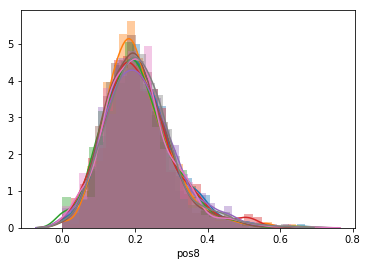

In [131]:
sns.distplot(nva.pos1)
sns.distplot(nva.pos2)
sns.distplot(nva.pos3)
sns.distplot(nva.pos4)
sns.distplot(nva.pos5)
sns.distplot(nva.pos6)
sns.distplot(nva.pos7)
sns.distplot(nva.pos8)


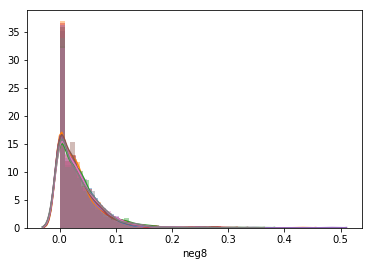

In [132]:
sns.distplot(nva.neg1)
sns.distplot(nva.neg2)
sns.distplot(nva.neg3)
sns.distplot(nva.neg4)
sns.distplot(nva.neg5)
sns.distplot(nva.neg6)
sns.distplot(nva.neg7)
sns.distplot(nva.neg8)

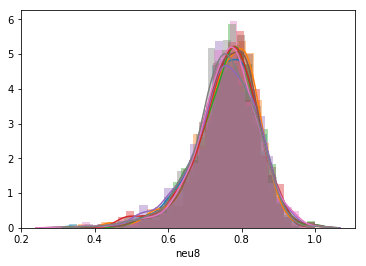

In [133]:
sns.distplot(nva.neu1)
sns.distplot(nva.neu2)
sns.distplot(nva.neu3)
sns.distplot(nva.neu4)
sns.distplot(nva.neu5)
sns.distplot(nva.neu6)
sns.distplot(nva.neu7)
sns.distplot(nva.neu8)

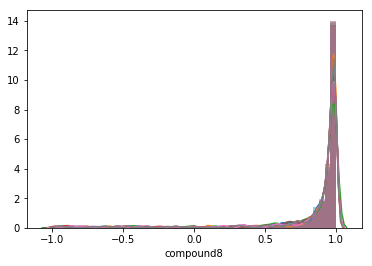

In [134]:
sns.distplot(nva.compound1)
sns.distplot(nva.compound2)
sns.distplot(nva.compound3)
sns.distplot(nva.compound4)
sns.distplot(nva.compound5)
sns.distplot(nva.compound6)
sns.distplot(nva.compound7)
sns.distplot(nva.compound8)


### Data Metrics Initial View

In [135]:
nva.describe()

,neg1,neu1,pos1,compound1,neg2,neu2,pos2,compound2,neg3,neu3,pos3,compound3,neg4,neu4,pos4,compound4,neg5,neu5,pos5,compound5,neg6,neu6,pos6,compound6,neg7,neu7,pos7,compound7,neg8,neu8,pos8,compound8,neg9,neu9,pos9,compound9,neg10,neu10,pos10,compound10,neg11,neu11,pos11,compound11,neg12,neu12,pos12,compound12,neg13,neu13,pos13,compound13,neg14,neu14,pos14,compound14,neg15,neu15,pos15,compound15,neg16,neu16,pos16,compound16,neg17,neu17,pos17,compound17,neg18,neu18,pos18,compound18,neg19,neu19,pos19,compound19,neg20,neu20,pos20,compound20
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.030789,0.755885,0.213351,0.855847,0.031214,0.760080,0.208730,0.860783,0.035118,0.759529,0.205363,0.797874,0.031866,0.756749,0.211385,0.829851,0.031533,0.755160,0.213307,0.845673,0.031280,0.762805,0.205905,0.851364,0.033108,0.758639,0.208245,0.824865,0.033176,0.752884,0.213937,0.848172,0.034108,0.759988,0.205910,0.832884,0.033151,0.756630,0.210209,0.837441,0.033181,0.759509,0.207315,0.844352,0.034293,0.754994,0.210696,0.833207,0.032805,0.761993,0.205214,0.821794,0.031936,0.762108,0.205963,0.817829,0.034947,0.749309,0.215743,0.829204,0.032607,0.752459,0.214927,0.850114,0.031648,0.760266,0.208102,0.828893,0.030833,0.755154,0.214002,0.834839,0.034832,0.758347,0.206822,0.818018,0.032090,0.753137,0.214796,0.839485
std,0.034506,0.086925,0.095024,0.337457,0.037924,0.086378,0.091684,0.312746,0.041632,0.087467,0.097116,0.418383,0.038703,0.088279,0.098562,0.384537,0.039904,0.090856,0.096465,0.344859,0.036718,0.082004,0.088143,0.329499,0.036598,0.088944,0.095741,0.382550,0.039381,0.086877,0.093796,0.346047,0.040532,0.088325,0.094276,0.357379,0.036362,0.087457,0.094032,0.353404,0.036403,0.087231,0.094293,0.343006,0.040457,0.086268,0.092516,0.366309,0.036657,0.088206,0.095532,0.379969,0.037784,0.088768,0.095618,0.389944,0.039862,0.090847,0.097764,0.377216,0.036097,0.091435,0.096214,0.342027,0.036359,0.089242,0.096973,0.380357,0.041408,0.095971,0.103010,0.367326,0.043016,0.087254,0.094651,0.403379,0.038659,0.086935,0.094405,0.358653
min,0.000000,0.331000,0.000000,-0.982100,0.000000,0.356000,0.000000,-0.981100,0.000000,0.313000,0.000000,-0.994200,0.000000,0.379000,0.000000,-0.988500,0.000000,0.408000,0.000000,-0.980100,0.000000,0.409000,0.000000,-0.981500,0.000000,0.302000,0.000000,-0.978000,0.000000,0.375000,0.000000,-0.958100,0.000000,0.348000,0.000000,-0.996100,0.000000,0.359000,0.000000,-0.990100,0.000000,0.320000,0.000000,-0.990500,0.000000,0.372000,0.000000,-0.960000,0.000000,0.306000,0.000000,-0.974000,0.000000,0.238000,0.000000,-0.991100,0.000000,0.256000,0.000000,-0.985300,0.000000,0.300000,0.000000,-0.973300,0.000000,0.401000,0.000000,-0.972400,0.000000,0.317000,0.000000,-0.979500,0.000000,0.302000,0.000000,-0.978200,0.000000,0.427000,0.000000,-0.989200
25%,0.000000,0.709000,0.148000,0.901275,0.000000,0.715750,0.148000,0.909075,0.000000,0.711000,0.140000,0.866550,0.000000,0.711000,0.145750,0.895950,0.000000,0.706000,0.148000,0.900725,0.000000,0.714000,0.145000,0.896050,0.000000,0.712750,0.143000,0.893650,0.000000,0.709000,0.151000,0.905600,0.000000,0.716000,0.141000,0.886825,0.000000,0.712000,0.149000,0.890375,0.000000,0.7

In [128]:
labels.describe()

count    888.000000
mean       4.152590
std        0.290926
min        3.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [136]:
nva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 963
Data columns (total 80 columns):
neg1          888 non-null float64
neu1          888 non-null float64
pos1          888 non-null float64
compound1     888 non-null float64
neg2          888 non-null float64
neu2          888 non-null float64
pos2          888 non-null float64
compound2     888 non-null float64
neg3          888 non-null float64
neu3          888 non-null float64
pos3          888 non-null float64
compound3     888 non-null float64
neg4          888 non-null float64
neu4          888 non-null float64
pos4          888 non-null float64
compound4     888 non-null float64
neg5          888 non-null float64
neu5          888 non-null float64
pos5          888 non-null float64
compound5     888 non-null float64
neg6          888 non-null float64
neu6          888 non-null float64
pos6          888 non-null float64
compound6     888 non-null float64
neg7          888 non-null float64
neu7          888 no

In [149]:
labelspd = pd.DataFrame(labels)

In [171]:
labelspd.rating.value_counts()

4.0    553
4.5    283
3.5     36
5.0     14
3.0      2
Name: rating, dtype: int64

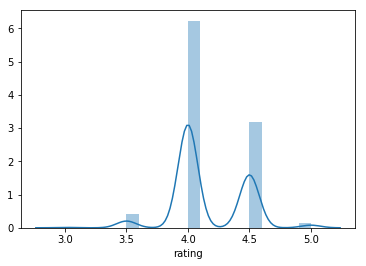

In [198]:
sns.distplot(labelspd.rating)

In [154]:
type(nva)

pandas.core.frame.DataFrame

In [199]:
labelspd.rating = labelspd.rating.replace({3.0: 0, 5.0: 1, 3.5: 0, 4.0: 0, 4.5: 1})

In [201]:
labelspd.rating.value_counts()

0.0    591
1.0    297
Name: rating, dtype: int64

## Prepping for Models

In [205]:
x = nva
y = labelspd

In [159]:
x.neg1.value_counts()

0.000    272
0.026     19
0.019     18
0.014     17
0.021     14
0.033     13
0.013     12
0.018     12
0.051     12
0.025     12
0.028     12
0.036     12
0.016     12
0.039     11
0.020     11
0.032     11
0.023     11
0.030     11
0.010     10
0.015     10
0.034     10
0.008      9
0.024      9
0.056      8
0.059      8
0.061      8
0.029      8
0.049      8
0.035      8
0.047      8
        ... 
0.167      1
0.107      1
0.112      1
0.103      1
0.140      1
0.128      1
0.253      1
0.111      1
0.224      1
0.144      1
0.174      1
0.147      1
0.095      1
0.239      1
0.120      1
0.080      1
0.154      1
0.146      1
0.177      1
0.099      1
0.126      1
0.106      1
0.113      1
0.117      1
0.121      1
0.116      1
0.122      1
0.133      1
0.156      1
0.081      1
Name: neg1, Length: 126, dtype: int64

In [206]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 42)

In [180]:
type(x_train),
type(y_train)

numpy.ndarray

In [181]:
y_train.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [183]:
x_train

array([[0.    , 0.429 , 0.571 , ..., 0.793 , 0.207 , 0.9891],
       [0.    , 0.775 , 0.225 , ..., 0.676 , 0.324 , 0.9814],
       [0.078 , 0.754 , 0.168 , ..., 0.796 , 0.172 , 0.9968],
       ...,
       [0.034 , 0.732 , 0.234 , ..., 0.797 , 0.203 , 0.8462],
       [0.025 , 0.879 , 0.096 , ..., 0.802 , 0.142 , 0.9885],
       [0.    , 0.702 , 0.298 , ..., 0.664 , 0.336 , 0.9694]])

In [182]:
y_train

array([[4.5],
       [4. ],
       [4. ],
       [3.5],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [4.5],
       [4. ],
       [4. ],
       [4. ],
       [4.5],
       [4.5],
       [4.5],
       [4. ],
       [4. ],
       [4.5],
       [4. ],
       [4. ],
       [4.5],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [4.5],
       [4. ],
       [4.5],
       [4. ],
       [4.5],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [4.5],
       [3.5],
       [4. ],
       [4.5],
       [4.5],
       [4.5],
       [4. ],
       [4. ],
       [4.5],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [4.5],
       [4. ],
       [3.5],
       [4. ],
       [4. ],
       [4.5],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [4.5],
       [4.5],
       [4.5],
       [4.5],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [4.5],
       [4. ],
      

### Encoding for Smote

In [194]:
lab_enc = preprocessing.LabelEncoder()
y_trainin = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[3 2 2 1 2 2 2 2 3 2 2 2 3 3 3 2 2 3 2 2 3 2 2 2 2 3 2 3 2 3 2 2 2 2 2 2 3
 1 2 3 3 3 2 2 3 2 2 2 2 2 3 2 1 2 2 3 2 2 2 2 2 3 3 3 3 2 2 2 2 3 2 2 2 2
 2 3 2 3 3 2 2 2 2 2 1 2 2 3 2 2 3 2 3 2 0 2 3 2 3 2 3 3 4 2 2 2 2 4 2 3 2
 3 3 2 2 2 2 2 2 2 2 2 3 3 2 2 3 3 2 2 2 3 2 2 2 2 2 3 3 2 3 2 2 3 2 2 3 2
 2 2 2 3 3 3 2 3 3 2 3 4 2 1 2 3 3 2 2 1 2 2 2 2 3 4 2 3 2 3 2 2 2 3 2 2 2
 3 3 2 2 3 2 2 2 2 2 1 2 3 2 3 2 2 2 3 2 2 2 2 1 2 2 3 2 3 3 3 3 2 3 3 2 2
 2 2 3 2 2 2 3 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 3 1 2 3 2 2 2 2 2 2 2
 2 3 2 2 2 2 2 3 2 2 1 3 2 3 3 2 3 2 3 2 2 2 3 2 3 2 2 3 2 2 3 2 2 2 3 2 3
 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 2 3 2 2 2 2 3 2 2 2 2 3 2 2 3 3 2 3 2 3 2 2
 3 2 2 2 2 1 2 2 3 1 3 2 3 3 3 3 2 3 2 3 3 1 2 3 2 3 2 3 2 2 3 2 2 3 2 3 3
 3 2 2 2 2 2 3 2 2 2 2 1 2 3 2 2 2 2 3 3 2 2 3 2 2 2 3 1 2 2 3 2 2 2 2 2 2
 3 2 0 2 2 2 3 2 2 2 2 2 2 2 3 3 2 2 3 2 2 2 2 2 2 2 2 3 4 3 1 3 2 2 2 2 2
 2 3 2 3 2 2 3 2 2 2 4 3 2 2 3 2 3 2 2 2 3 2 2 3 2 2 2 2 2 3 3 2 2 2 3 2 2
 3 2 2 2 3 3 2 2 2 2 2 3 

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Smoting

In [208]:
print(y.rating.value_counts()) #Previous original class distribution
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_sample(x_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

0.0    591
1.0    297
Name: rating, dtype: int64
0.0    479
1.0    479
dtype: int64


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Helper Functions

In [216]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
import xgboost as xgb

### Confusion Matrix

In [210]:

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    # Compute confusion matrix
    cmat = pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix

plt.show()

In [223]:
def plot_confusion_matrix1(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### Metric Scores

In [211]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='macro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='macro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='macro')))

### Feature Importance Graphs

In [212]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

## Modeling

### Dummy Classifier

In [217]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'uniform')
dummy.fit(x_train_resampled, y_train_resampled)
dummypred = dummy.predict(x_test)
print_metrics(y_test, dummypred)

Precision Score: 0.4720430107526882
Recall Score: 0.47010281385281383
Accuracy Score: 0.46629213483146065
F1 Score: 0.46014111036618455


### KNN

In [218]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
knnfit = knn.fit(x_train_resampled, y_train_resampled)
test_preds5 = knn.predict(x_test)
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='macro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='macro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='macro')))
    
print_metrics(y_test, test_preds5)

Precision Score: 0.5781228433402346
Recall Score: 0.5765692640692641
Accuracy Score: 0.5337078651685393
F1 Score: 0.5335753749013417


In [222]:
plot_confusion_matrix1(cm =(y_test, test_preds5), normalize=False, target_names=['', title='KNN')

ValueError: Shape of passed values is (1, 2), indices imply (178, 2)

### Decision Trees

In [ ]:
clf= DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train_resampled,y_train_resampled) 
dtree_pred = clf.predict(x_test)

### Regression Trees

In [ ]:
#Regression Tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 10, max_depth=7, min_samples_leaf = 2)
regressor.fit(x_train_resampled, y_train_resampled)

### Bagged Tree

In [ ]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
clf = bagged_tree.fit(x_train_resampled, y_train_resampled)
bagged_pred = bagged_tree.predict(x_test)

### Random Forests

In [197]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5, max_leaf_nodes = 10)
forest.fit(x_train_resampled, y_train_resampled)

RFpred = forest.predict(x_test)
print(confusion_matrix(y_test, RFpred))
print(classification_report(y_test, RFpred))

NameError: name 'RandomForestClassifier' is not defined

### AdaBoost and Gradient Boosting

In [ ]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier(learning_rate =.02)


In [ ]:
adaboost_clf.fit(x_train_resampled, y_train_resampled)

In [ ]:
gbt_clf.fit(x_train_resampled, y_train_resampled)

In [ ]:
adaboost_train_preds = adaboost_clf.predict(x_train_resampled)
adaboost_test_preds = adaboost_clf.predict(x_test)
gbt_clf_train_preds = gbt_clf.predict(x_train_resampled)
gbt_clf_test_preds = gbt_clf.predict(x_test)

In [ ]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average = 'macro')
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train_resampled, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train_resampled, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

In [ ]:
print(classification_report(y_test, adaboost_test_preds))
print(classification_report(y_test, gbt_clf_test_preds))

### XGBoost

In [ ]:
clf = xgb.XGBClassifier()
xgb = clf.fit(np.array(x_train_resampled), np.array(y_train_resampled))
training_preds = clf.predict(np.array(x_train_resampled))
xgb_preds = clf.predict(np.array(x_test))
training_accuracy = accuracy_score(np.array(y_train_resampled), training_preds)
val_accuracy = accuracy_score(np.array(y_test), xgb_preds)